  Borough  Crime_Count  Median_Income
0       B        15837             49
1       K        20064             77
2       M        17133            101
3       Q        15193             85
4       S         3015             95


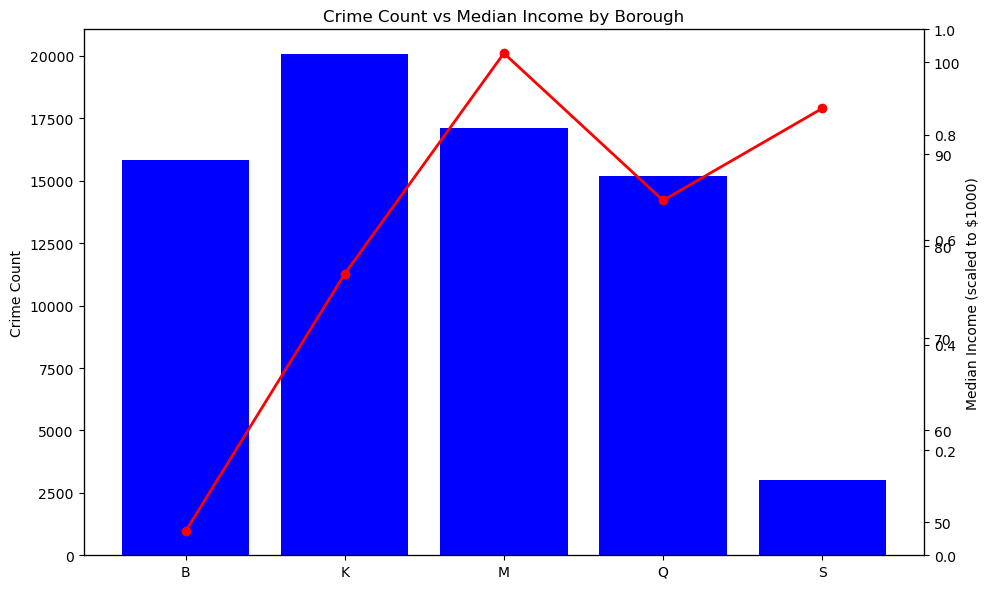

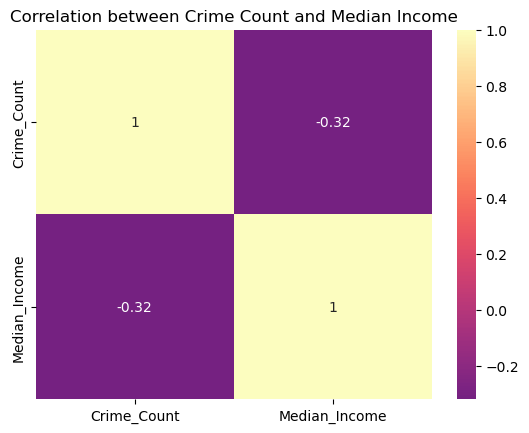

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def eda(df):
    print("dataframe shape: ", df.shape)
    print("dataframe columns: ", df.columns)
    print("dataframe dtypes: ", df.dtypes)

def boro_crime_income_comparison(df):
    boro_crime_count = df.groupby('ARREST_BORO')['ARREST_KEY'].count()
    boro_avg_income = {
        'B': 49,  # Bronx
        'K': 77,  # Brooklyn
        'M': 101, # Manhattan
        'Q': 85,  # Queens
        'S': 95   # Staten Island
    }
    boro_df = pd.DataFrame({
        'Borough': boro_crime_count.index,
        'Crime_Count': boro_crime_count.values,
        'Median_Income': [boro_avg_income[boro] for boro in boro_crime_count.index]
    })
    print(boro_df)
    incomes = [boro_avg_income[boro] for boro in boro_crime_count.index]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    bars = ax1.bar(boro_crime_count.index, boro_crime_count.values, color='blue', label='Crime Count')
    ax1.set_ylabel('Crime Count', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax2 = ax1.twinx()
    ax2.plot(boro_crime_count.index, incomes, color='red', linewidth=2, label='Median Income',marker='o')
    ax2.set_ylabel('Median Income (scaled to $1000)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    plt.title('Crime Count vs Median Income by Borough')
    ax3 = ax1.twinx()
    ax3.set_xlabel('Borough')
    fig.tight_layout()
    plt.show()
    corrq=boro_df[['Crime_Count','Median_Income']].corr()
    sns.heatmap(corrq, annot=True, cmap='magma', center=0)
    plt.title('Correlation between Crime Count and Median Income')
    plt.show()

if __name__ == "__main__":
    df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
    boro_crime_income_comparison(df)